# Testando Outros Modelos Chile

Neste notebook será testado outros modelo de séries temporais da Covid no Chile, comparando os resultados com o modelo baseline feito na sprint 2.

In [ ]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pmdarima
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
serie_chi = pd.read_csv('Séries Temporais Chile.csv')
serie_chi.drop('Unnamed: 0',axis=1,inplace=True)
serie_chi['Date'] = pd.to_datetime(serie_chi['Date'],format='%Y-%m-%d')
serie_chi['Mês'] = serie_chi['Date'].dt.month
serie_chi.head()

,Date,Confirmed,Recovered,Deaths,Ano,Mês
0,2020-01-22,0,0.0,0,2020,1
1,2020-01-23,0,0.0,0,2020,1
2,2020-01-24,0,0.0,0,2020,1
3,2020-01-25,0,0.0,0,2020,1
4,2020-01-26,0,0.0,0,2020,1


In [ ]:
serie_chi.set_index('Date',inplace=True)
serie_chi.head()

,Confirmed,Recovered,Deaths,Ano,Mês
Date,,,,,
2020-01-22,0,0.0,0,2020,1
2020-01-23,0,0.0,0,2020,1
2020-01-24,0,0.0,0,2020,1
2020-01-25,0,0.0,0,2020,1
2020-01-26,0,0.0,0,2020,1


In [ ]:
treino = serie_chi[(serie_chi['Ano']<=2021)&(serie_chi['Mês']<12)]
teste = serie_chi[(serie_chi['Ano']==2021)&(serie_chi['Mês'] == 12)]

In [ ]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7776.542, Time=0.16 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=7479.903, Time=0.98 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=7481.221, Time=2.09 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=7608.722, Time=0.43 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=7481.082, Time=2.36 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=7482.825, Time=4.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7535.958, Time=1.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.47 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=16.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=7778.312, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=7466.511, Time=3.43 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=4.71 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=7607.128, Time=0.68 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=3.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=16.24 sec
 ARIMA(0,1,1)(2,1,

In [ ]:
step2 = auto_arima(serie_chi['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8179.301, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8001.288, Time=0.73 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=7874.379, Time=2.63 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=8181.167, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=4.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=7876.004, Time=4.61 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=8001.218, Time=0.68 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=8.38 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=7895.609, Time=0.81 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=2.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=6.30 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=7876.219, Time=4.11 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
T

In [ ]:
step1.fit(treino['Deaths'])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step2.fit(treino['Deaths'])

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast=step1.predict(n_periods=len(teste))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
future_forecast1=step2.predict(n_periods=len(teste))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


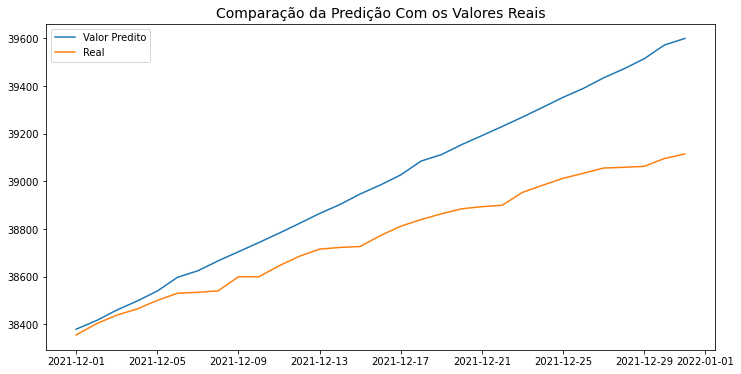

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 220.79378615722183
MAPE: 0.0056749340482763625
RMSE: 261.174255213807


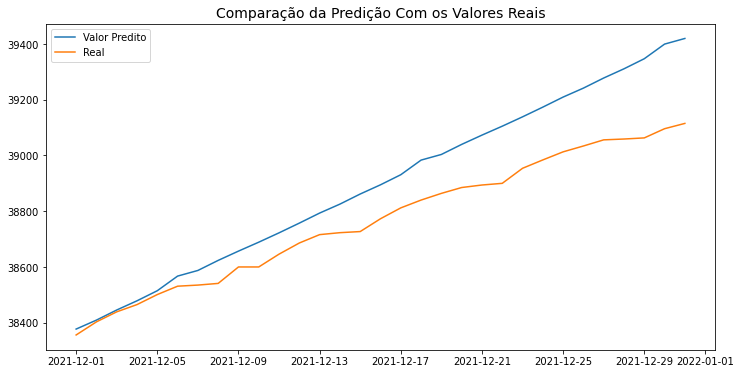

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 130.5651911801772
MAPE: 0.003355357711384228
RMSE: 157.15243237668253
